# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use a clean style
sns.set(style="whitegrid")


In [2]:
# Load your CSV file
df = pd.read_csv(r"C:\Users\asus\Downloads\index.csv")

# Preview data
print(df.head())


         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  


# data cleaning

In [3]:
# Convert dates
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])

# Add hour and day name
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()

# Flag for card payment
df['is_card_payment'] = df['cash_type'].apply(lambda x: 1 if x.lower() == 'card' else 0)

# Fill missing card IDs with 'CASH'
df['card'] = df['card'].fillna('CASH')

# Preview again
print(df.head())


        date                datetime cash_type                 card  money  \
0 2024-03-01 2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1 2024-03-01 2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2 2024-03-01 2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3 2024-03-01 2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4 2024-03-01 2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  hour day_of_week  is_card_payment  
0          Latte    10      Friday                1  
1  Hot Chocolate    12      Friday                1  
2  Hot Chocolate    12      Friday                1  
3      Americano    13      Friday                1  
4          Latte    13      Friday                1  


# EDA

## Daily Sales Trend

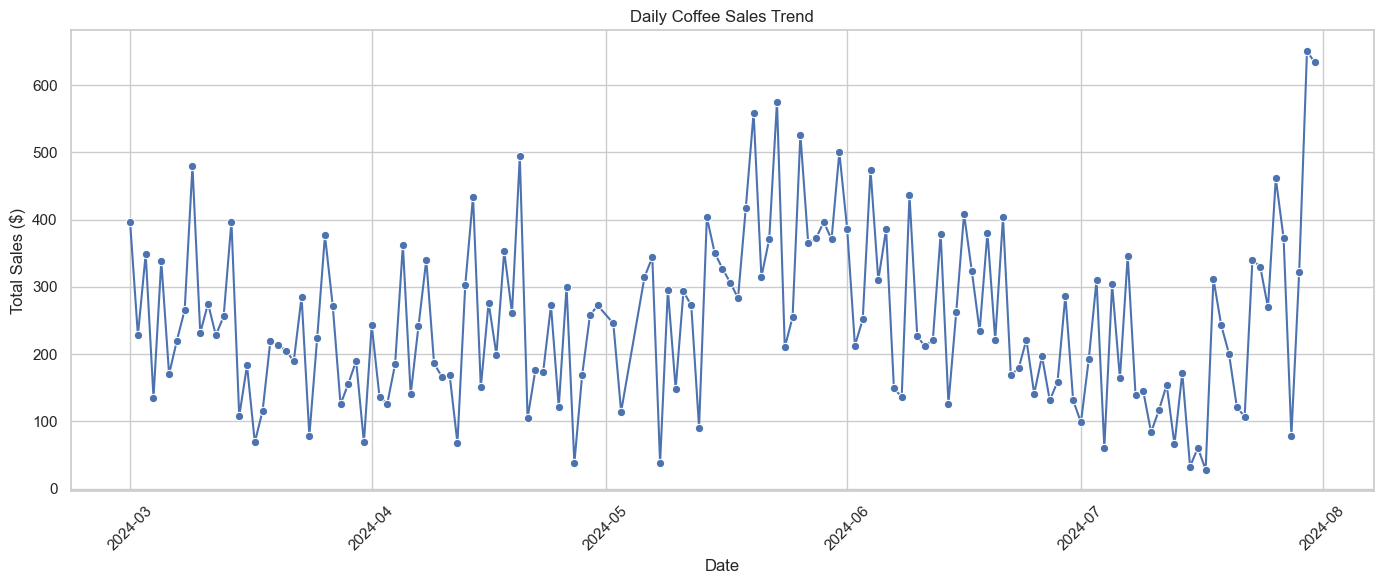

In [4]:
# Group by date
daily_sales = df.groupby('date')['money'].sum().reset_index()

# Plot trend
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_sales, x='date', y='money', marker='o')
plt.title('Daily Coffee Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Best-Selling Coffees

C:\Users\asus\AppData\Local\Temp\ipykernel_17796\1454369151.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_coffees.values, y=top_coffees.index, palette='viridis')


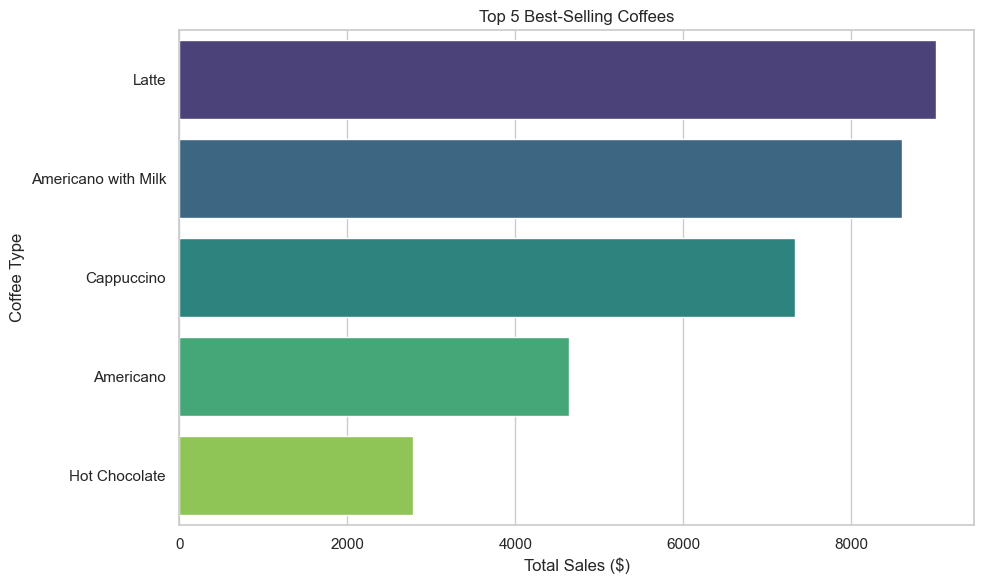

In [5]:
# Group by coffee type
top_coffees = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False).head(5)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_coffees.values, y=top_coffees.index, palette='viridis')
plt.title('Top 5 Best-Selling Coffees')
plt.xlabel('Total Sales ($)')
plt.ylabel('Coffee Type')
plt.tight_layout()
plt.show()

## Payment Method 

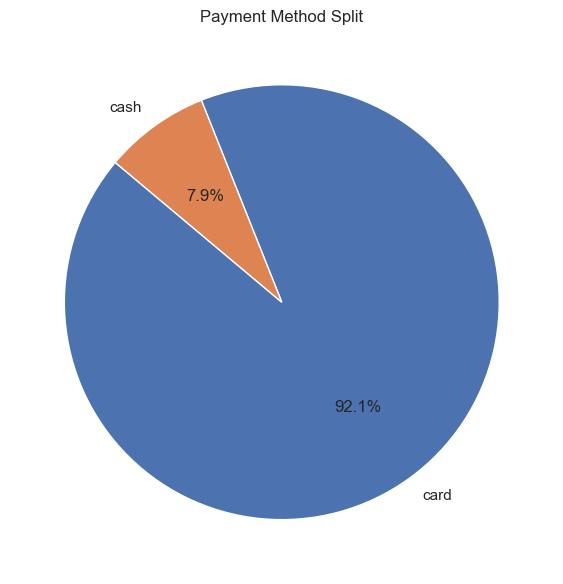

In [6]:
# Count payment types
payment_split = df['cash_type'].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
payment_split.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Payment Method Split')
plt.ylabel('')
plt.tight_layout()
plt.show()

## Revenue by Hour

C:\Users\asus\AppData\Local\Temp\ipykernel_17796\3661796541.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly_sales, x='hour', y='money', palette='coolwarm')


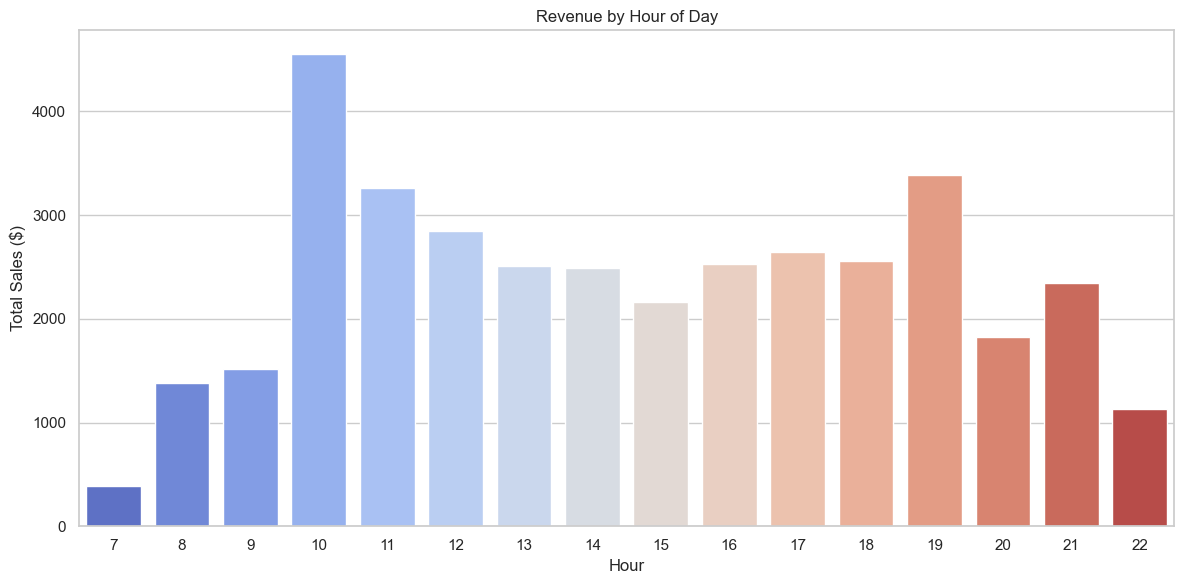

In [7]:
# Group by hour
hourly_sales = df.groupby('hour')['money'].sum().reset_index()

# Bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_sales, x='hour', y='money', palette='coolwarm')
plt.title('Revenue by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.show()

## Repeat Card Customers

In [8]:
# Filter out CASH
card_customers = df[df['card'] != 'CASH']

# Count repeat cards
repeat_customers = card_customers['card'].value_counts()
repeat_customers = repeat_customers[repeat_customers > 1]

print(f"Number of repeat card customers: {len(repeat_customers)}")
print(repeat_customers.head(10))


Number of repeat card customers: 165
card
ANON-0000-0000-0012    88
ANON-0000-0000-0009    63
ANON-0000-0000-0097    27
ANON-0000-0000-0003    23
ANON-0000-0000-0040    22
ANON-0000-0000-0141    17
ANON-0000-0000-0001    17
ANON-0000-0000-0024    12
ANON-0000-0000-0180    12
ANON-0000-0000-0059    12
Name: count, dtype: int64


## Daily sales

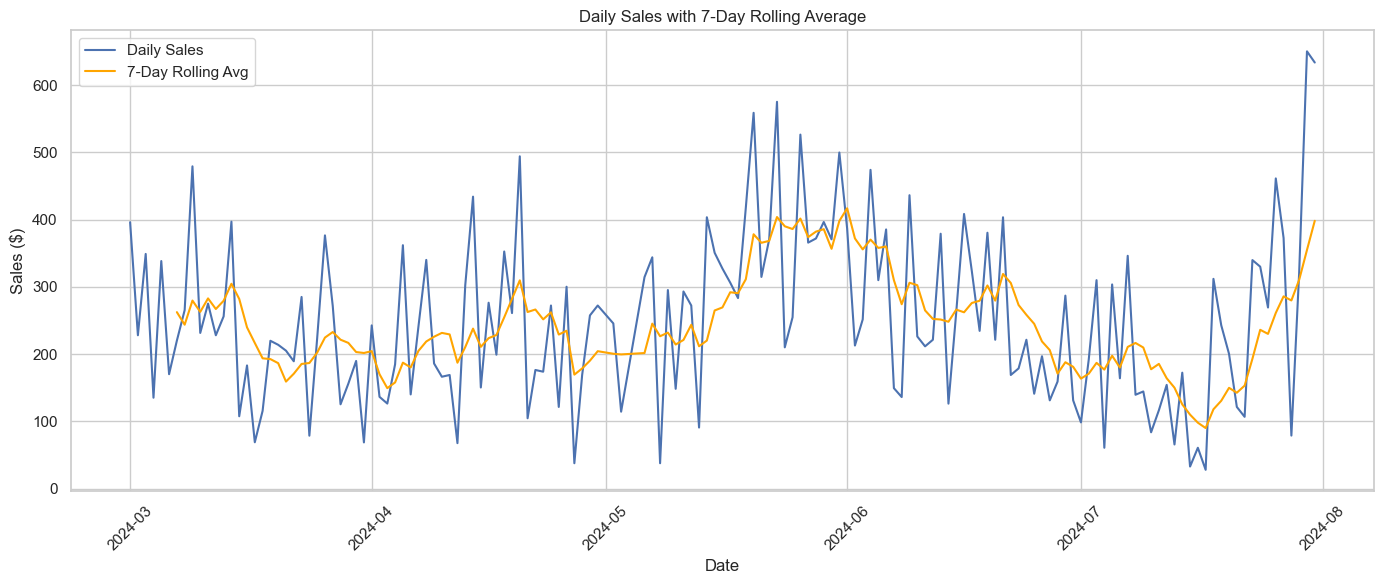

In [9]:
# Calculate daily sales 
daily_sales = df.groupby('date')['money'].sum().reset_index()

# Add 7-day rolling average
daily_sales['7_day_avg'] = daily_sales['money'].rolling(window=7).mean()

# Plot daily vs. rolling
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_sales, x='date', y='money', label='Daily Sales')
sns.lineplot(data=daily_sales, x='date', y='7_day_avg', label='7-Day Rolling Avg', color='orange')
plt.title('Daily Sales with 7-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Weekly Sales

C:\Users\asus\AppData\Local\Temp\ipykernel_17796\2113681072.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekly_sales, x='week', y='money', palette='Blues')


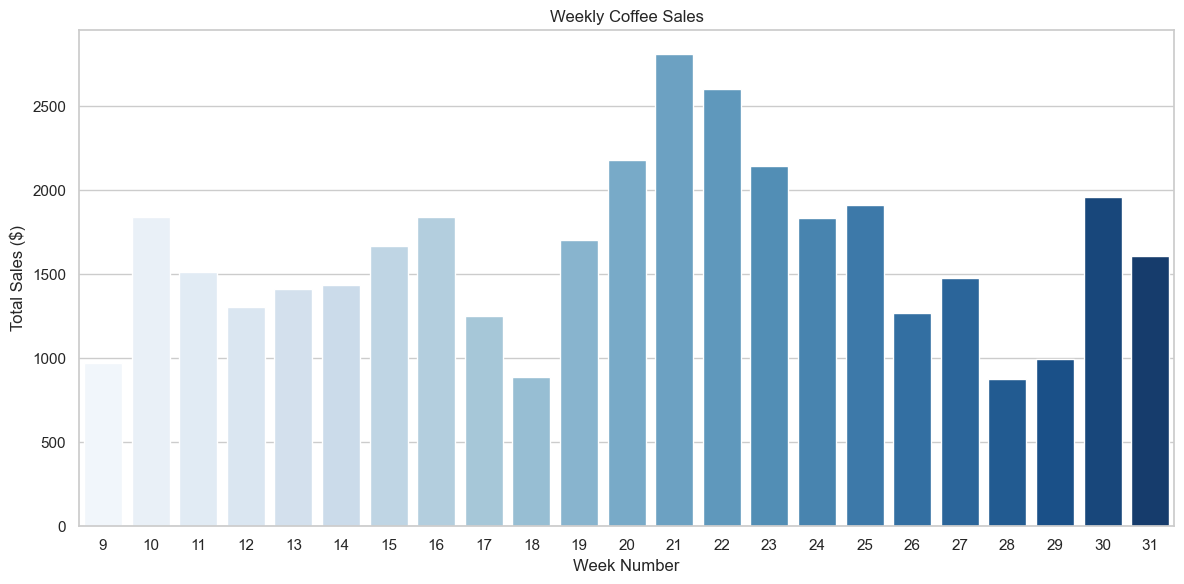

In [10]:
# Add week number
df['week'] = df['date'].dt.isocalendar().week

# Weekly sales sum
weekly_sales = df.groupby('week')['money'].sum().reset_index()

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=weekly_sales, x='week', y='money', palette='Blues')
plt.title('Weekly Coffee Sales')
plt.xlabel('Week Number')
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.show()


## Monthly Sales

C:\Users\asus\AppData\Local\Temp\ipykernel_17796\4031690142.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_sales, x='month', y='money', palette='Purples')


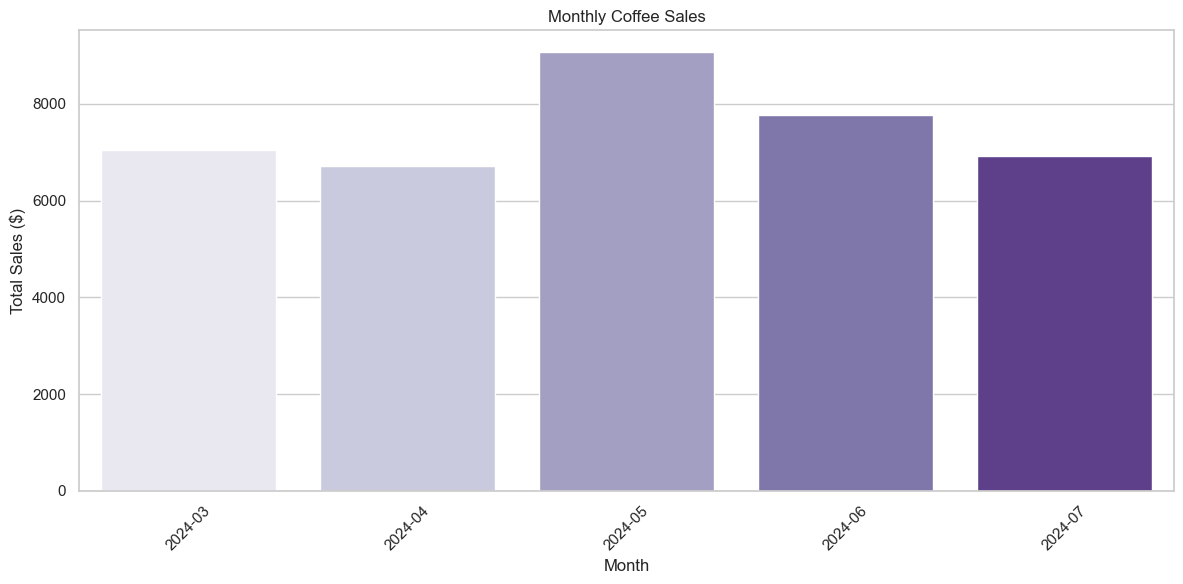

In [11]:
# Add month period
df['month'] = df['date'].dt.to_period('M')

# Monthly sales sum
monthly_sales = df.groupby('month')['money'].sum().reset_index()

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_sales, x='month', y='money', palette='Purples')
plt.title('Monthly Coffee Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##  Individual Customer Purchase History

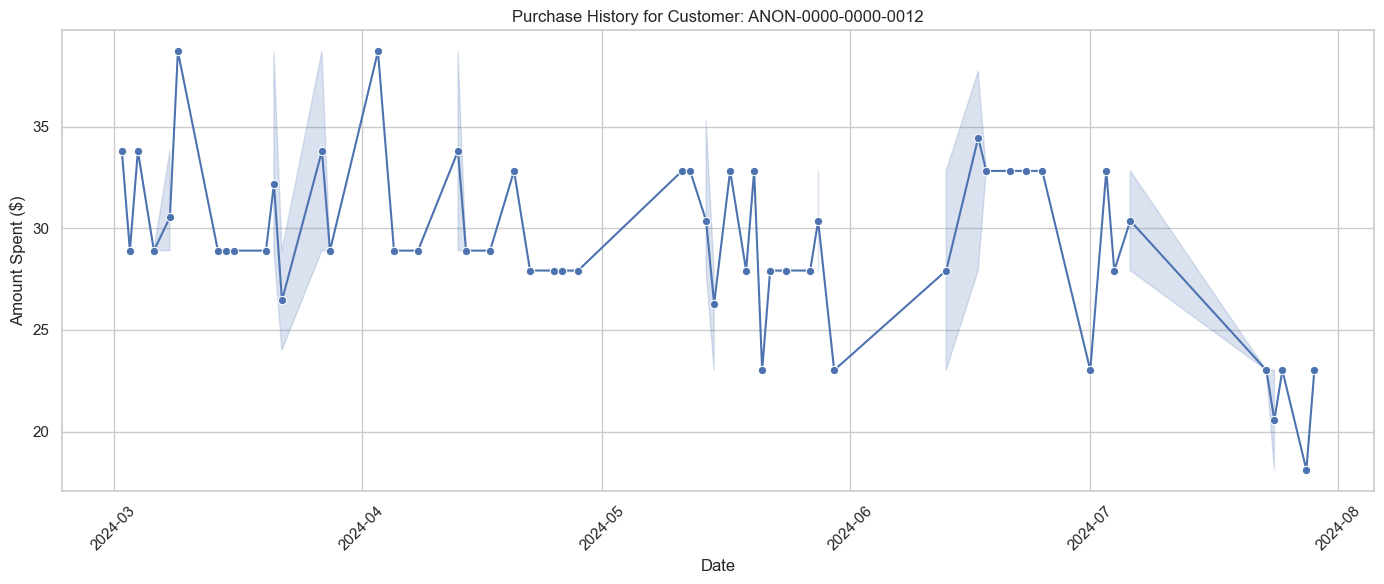

           date          coffee_name  money
14   2024-03-02  Americano with Milk  33.80
21   2024-03-03            Americano  28.90
30   2024-03-04  Americano with Milk  33.80
42   2024-03-06            Americano  28.90
43   2024-03-06              Cortado  28.90
...         ...                  ...    ...
1027 2024-07-24             Espresso  18.12
1033 2024-07-24            Americano  23.02
1034 2024-07-25            Americano  23.02
1073 2024-07-28             Espresso  18.12
1077 2024-07-29            Americano  23.02

[88 rows x 3 columns]


In [12]:
# Get repeat customers again
repeat_customers = df[df['card'] != 'CASH']['card'].value_counts()
repeat_customers = repeat_customers[repeat_customers > 1]

# Pick one repeat customer ID
sample_customer = repeat_customers.index[0]

# Filter purchases for this customer
customer_df = df[df['card'] == sample_customer]

# Plot their purchases over time
plt.figure(figsize=(14, 6))
sns.lineplot(data=customer_df, x='date', y='money', marker='o')
plt.title(f'Purchase History for Customer: {sample_customer}')
plt.xlabel('Date')
plt.ylabel('Amount Spent ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Show details
print(customer_df[['date', 'coffee_name', 'money']])

## Weekday vs Hour

C:\Users\asus\AppData\Local\Temp\ipykernel_17796\65838989.py:32: UserWarning: Glyph 9749 (\N{HOT BEVERAGE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\asus\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9749 (\N{HOT BEVERAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


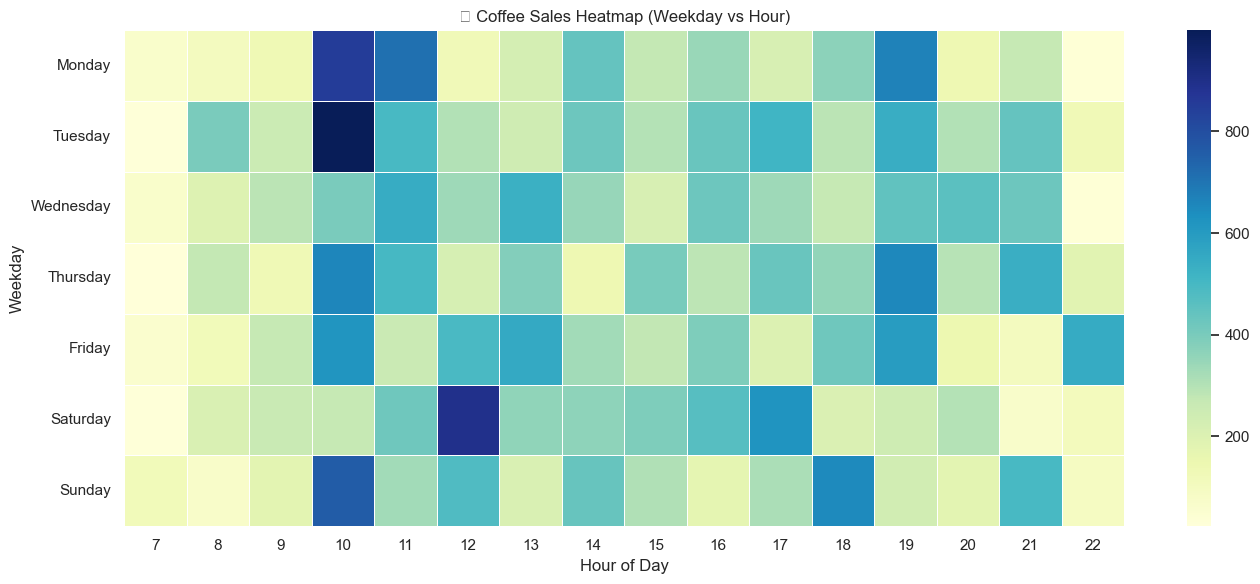

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv(r"C:\Users\asus\Downloads\index.csv")

# Parse datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# Use 'money' as sales
SALES_COL = 'money'

# Ensure hour & weekday
df['hour'] = df['hour'] if 'hour' in df.columns else df['datetime'].dt.hour
df['weekday'] = df['weekday'] if 'weekday' in df.columns else df['datetime'].dt.day_name()

# Group & pivot
heatmap_data = df.groupby(['weekday', 'hour'])[SALES_COL].sum().reset_index()
heatmap_pivot = heatmap_data.pivot(index='weekday', columns='hour', values=SALES_COL)

# Order weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_pivot = heatmap_pivot.reindex(weekday_order)

# Plot
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_pivot, cmap='YlGnBu', linewidths=.5)
plt.title('☕ Coffee Sales Heatmap (Weekday vs Hour)')
plt.xlabel('Hour of Day')
plt.ylabel('Weekday')
plt.tight_layout()
plt.show()


## future sales prediction

20:30:26 - cmdstanpy - INFO - Chain [1] start processing
20:30:26 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\asus\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9749 (\N{HOT BEVERAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


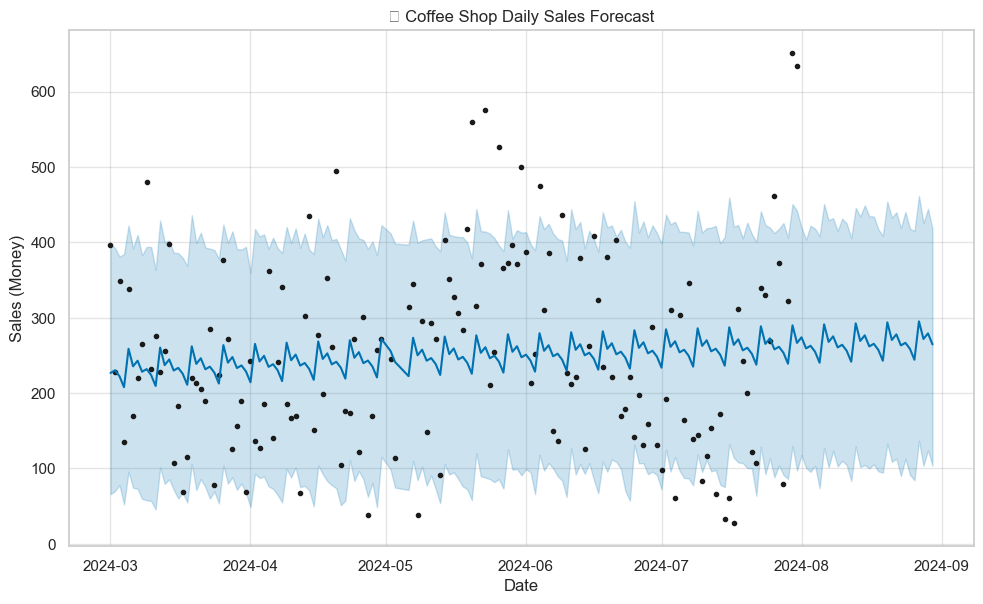

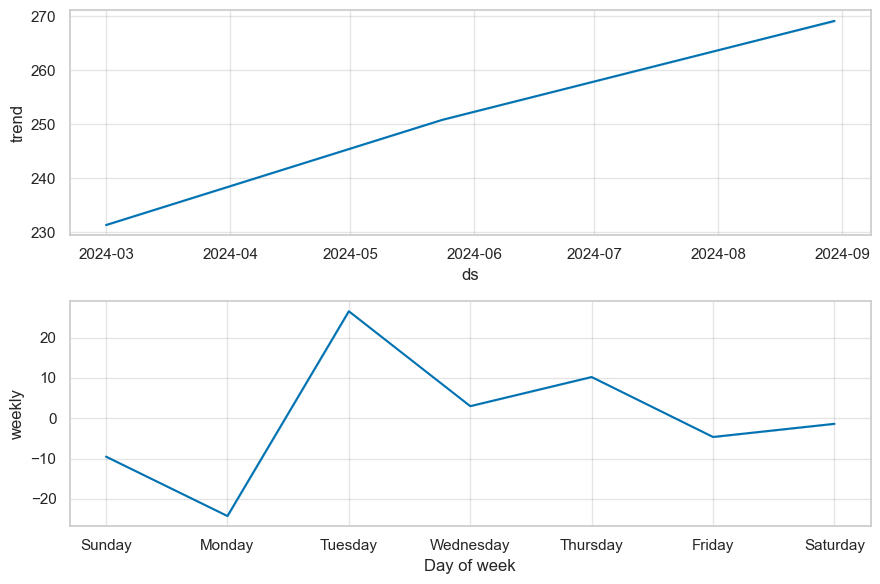

In [14]:
from prophet import Prophet
# Ensure datetime is parsed
df['datetime'] = pd.to_datetime(df['datetime'])

# Aggregate daily sales
daily_sales = df.groupby(df['datetime'].dt.date)['money'].sum().reset_index()
daily_sales.columns = ['ds', 'y']  # Prophet needs these names

# Initialize and fit Prophet
model = Prophet()
model.fit(daily_sales)

# Make future dataframe for next 30 days
future = model.make_future_dataframe(periods=30)

# Forecast
forecast = model.predict(future)

# Plot forecast
fig1 = model.plot(forecast)
plt.title("☕ Coffee Shop Daily Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales (Money)")
plt.show()

# Optional: Plot forecast components (trend & seasonality)
fig2 = model.plot_components(forecast)
plt.show()


# summary 
### 📌 Project Findings & Insights

**1️⃣ Data Cleaning & Preparation**  
- Parsed `datetime` values.  
- Verified `money` as total sales.  
- Created `hour` and `weekday` columns.

**2️⃣ EDA Highlights**  
- Heatmap shows weekday vs hour sales patterns.  
- Peak hours: morning & early afternoon.  
- Weekdays stronger than weekends.

**3️⃣ Forecast**  
- Prophet forecast for next 30 days.  
- Steady upward trend with seasonality.  
- Guides planning for stock & shifts.

**4️⃣ Deliverables**  
- Clean dataset, EDA visuals, forecast charts.  
- Automated PDF/DOCX/PPTX reports.  
- Deployed live dashboard.

**5️⃣ Suggested Actions**  
- Optimize promotions for peak times.  
- Use forecast for smart ordering.  
- Add product-level and payment breakdowns.

**Key Insight:**  
Data shows clear patterns that help run operations better and boost sales sustainably.

---

**Author:** Ambrose Henry  
GitHub: [coffee-sales-analysis](https://github.com/IamAmbrose/coffee-sales-analysis)  
License: MIT
